In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data = yf.download("MANU OLG.PA AJAX.AS BVB.DE JUVE.MI", start="2017-12-20", end="2022-12-20")

[*********************100%***********************]  5 of 5 completed


In [54]:
data.head()

Adj Close                                         Close         \
             AJAX.AS    BVB.DE   JUVE.MI       MANU OLG.PA AJAX.AS BVB.DE   
Date                                                                        
2017-12-20  9.978606  6.002633  0.700381  19.892118   2.86  10.100  6.086   
2017-12-21  9.939087  6.002633  0.705446  20.130062   2.85  10.060  6.086   
2017-12-22  9.924267  6.000660  0.704525  19.321054   2.84  10.045  6.084   
2017-12-26       NaN       NaN       NaN  19.225878    NaN     NaN    NaN   
2017-12-27  9.850168  6.025318  0.704986  19.225878   2.86   9.970  6.109   

                                        ...    Open                   \
             JUVE.MI       MANU OLG.PA  ... AJAX.AS BVB.DE   JUVE.MI   
Date                                    ...                            
2017-12-20  0.700381  20.900000   2.86  ...   9.902  6.176  0.698539   
2017-12-21  0.705446  21.150000   2.85  ...  10.000  6.087  0.710511   
2017-12-22  0.704525  20.299999   2.84  ...  10.060  6.149  0.707748   
2017-12-26       NaN  20.200001    NaN  ...     NaN    NaN       NaN   
2017-12-27  0.704986  20.200001   2.86  ...  10.000  6.114  0.716497   

                              Volume                                         
                 MANU OLG.PA AJAX.AS    BVB.DE    JUVE.MI     MANU   OLG.PA  
Date                                                                         
2017-12-20  20.450001   2.86  1626.0  527560.0  4950273.0  59000.0   7653.0  
2017-12-21  20.900000   2.85  1301.0  169166.0  3631232.0  56400.0  17076.0  
2017-12-22  21.150000   2.83  1678.0  162061.0  2029548.0  34100.0  14623.0  
2017-12-26  20.250000    NaN     NaN       NaN        NaN  16300.0      NaN  
2017-12-27  20.299999   2.83   974.0  157534.0  2977641.0  14100.0  40408.0  

[5 rows x 30 columns]

In [55]:
data.tail()

Adj Close                                    Close                 \
             AJAX.AS BVB.DE JUVE.MI       MANU OLG.PA AJAX.AS BVB.DE JUVE.MI   
Date                                                                           
2022-12-13     11.30  3.600  0.2530  20.680000   2.89   11.30  3.600  0.2530   
2022-12-14     11.40  3.616  0.2644  21.590000   2.89   11.40  3.616  0.2644   
2022-12-15     11.40  3.564  0.2834  21.620001   2.90   11.40  3.564  0.2834   
2022-12-16     11.20  3.572  0.2782  21.850000   2.90   11.20  3.572  0.2782   
2022-12-19     10.85  3.554  0.2790  21.270000   2.95   10.85  3.554  0.2790   

                              ...    Open                                   \
                 MANU OLG.PA  ... AJAX.AS BVB.DE JUVE.MI       MANU OLG.PA   
Date                          ...                                            
2022-12-13  20.680000   2.89  ...   11.35  3.608  0.2506  20.680000   2.89   
2022-12-14  21.590000   2.89  ...   11.50  3.650  0.2548  20.740000   2.90   
2022-12-15  21.620001   2.90  ...   11.25  3.592  0.2670  21.049999   2.90   
2022-12-16  21.850000   2.90  ...   11.05  3.550  0.2856  21.520000   2.90   
2022-12-19  21.270000   2.95  ...   11.25  3.572  0.2778  21.490000   2.90   

            Volume                                               
           AJAX.AS    BVB.DE     JUVE.MI       MANU      OLG.PA  
Date                                                             
2022-12-13   339.0  113584.0   7209139.0  1244800.0    109250.0  
2022-12-14   395.0   55417.0  13908800.0  1102100.0     70367.0  
2022-12-15   666.0   89150.0  28390983.0  1260200.0     33856.0  
2022-12-16   120.0  121505.0  18371193.0  1428000.0     54929.0  
2022-12-19   886.0   87743.0   8360266.0  1025200.0  39265348.0  

[5 rows x 30 columns]

In [61]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2017-12-20 to 2022-12-19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AJAX.AS  1280 non-null   float64
 1   BVB.DE   1267 non-null   float64
 2   JUVE.MI  1269 non-null   float64
 3   MANU     1258 non-null   float64
 4   OLG.PA   1281 non-null   float64
dtypes: float64(5)
memory usage: 60.6 KB


In [63]:
data['daily_returns']=(data['Close'].pct_change())*100

ValueError: ignored

In [62]:
data['Return'] = 100 * (data['Adj Close'].pct_change())

ValueError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7eb3a6d30>,
      dtype=object)

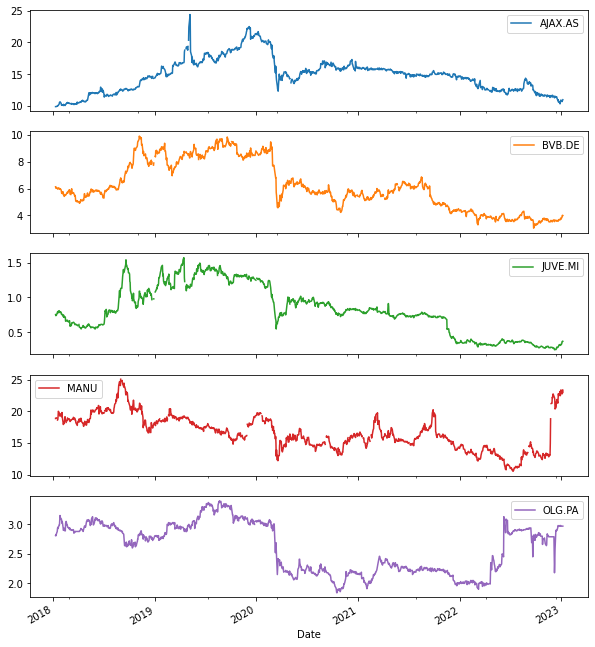

In [40]:
ADJ.plot(figsize=(10, 12), subplots=True)

In [41]:
ADJ.describe().round(2)

,AJAX.AS,BVB.DE,JUVE.MI,MANU,OLG.PA
count,1282.00,1269.00,1271.00,1258.00,1283.00
mean,14.78,6.13,0.82,16.63,2.61
std,2.68,1.82,0.35,2.73,0.42
min,9.86,3.03,0.25,10.51,1.84
25%,12.55,4.73,0.57,14.67,2.21
50%,14.90,5.82,0.78,16.31,2.75
75%,16.10,7.84,1.09,18.58,2.97
max,24.40,9.92,1.57,25.05,3.40


In [49]:
daily_volatility = data['Adj Close'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

from tabulate import tabulate

print(tabulate([['data',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

╒══════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│      │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞══════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ data │ AJAX.AS    2.660947  │  AJAX.AS    12.193990  │ AJAX.AS    42.241221  │
│      │ BVB.DE     1.823804  │  BVB.DE      8.357719  │ BVB.DE     28.951987  │
│      │ JUVE.MI    0.348607  │  JUVE.MI     1.597518  │ JUVE.MI     5.533964  │
│      │ MANU       2.745695  │  MANU       12.582357  │ MANU       43.586562  │
│      │ OLG.PA     0.424119  │  OLG.PA      1.943559  │ OLG.PA      6.732685  │
│      │    dtype: float64    │     dtype: float64     │    dtype: float64     │
╘══════╧══════════════════════╧════════════════════════╧═══════════════════════╛


In [28]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 15.9 MB/s eta 0:00:00


In [29]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(manu_data['Daily_Returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

mu          0.025280
omega       0.441639
alpha[1]    0.122357
beta[1]     0.797608
Name: params, dtype: float64


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2023-01-06  5.387071  5.397552  5.407195  5.416066  5.424227


Text(0.5, 1.0, 'Rolling Prediction')

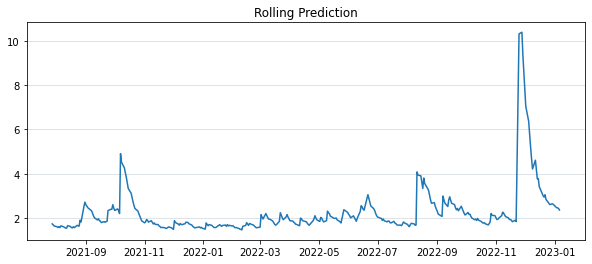

In [33]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = manu_data['Daily_Returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=manu_data['Daily_Returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

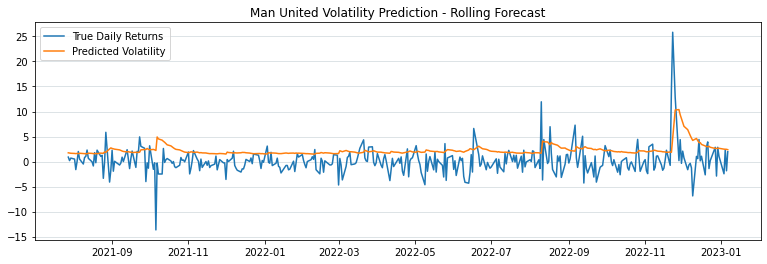

In [32]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(manu_data['Daily_Returns'][-365:])
plt.plot(rolling_predictions)
plt.title('Man United Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])